In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt`
plt.rcParams['figure.figsize']=(14,10)

In [3]:
plt.rcParams['image.aspect'] = 'auto'
plt.rcParams['image.interpolation'] = 'none'

In [4]:
import numpy as np

In [6]:
from iuvs import io
fname = io.l1b_filenames("cruisecal2-mode080-muv", stage=False)
fname

['/Users/klay6683/data/iuvs/level1b/mvn_iuv_l1b_cruisecal2-mode080-muv_20140521T120029_v01_r01.fits.gz']

In [7]:
l1b = io.L1BReader(fname[0])

In [3]:
l1b.detector_raw.shape

(46, 62, 341)

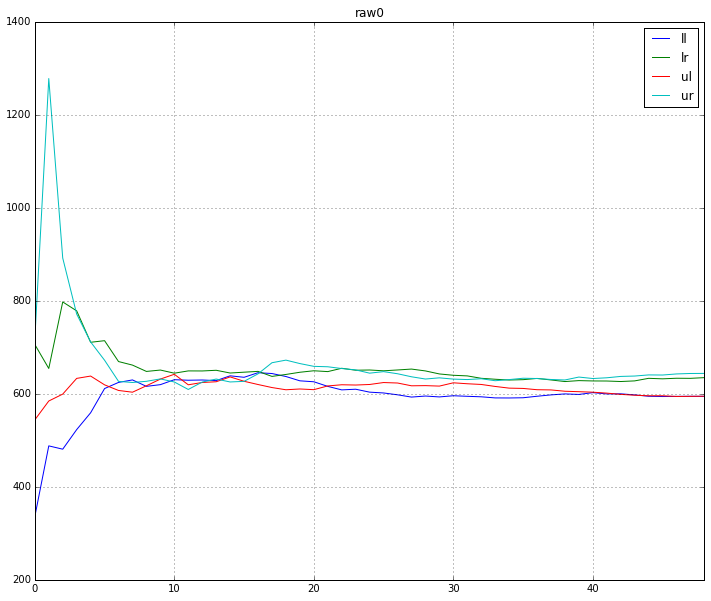

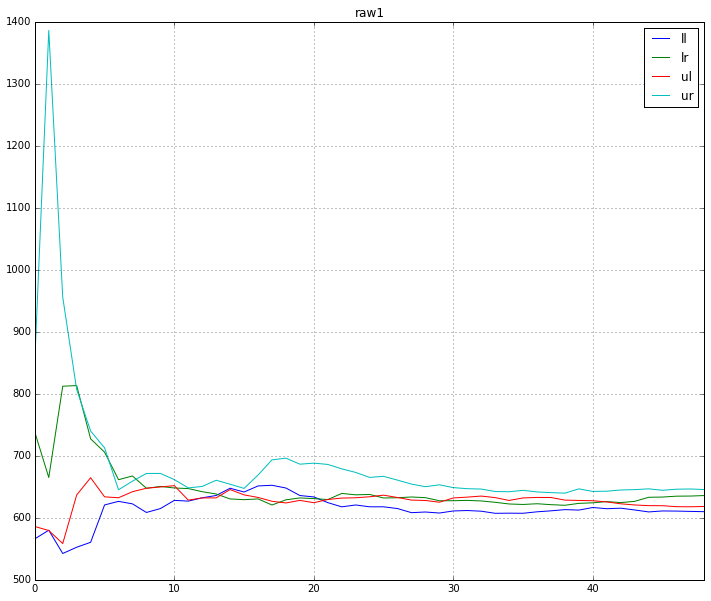

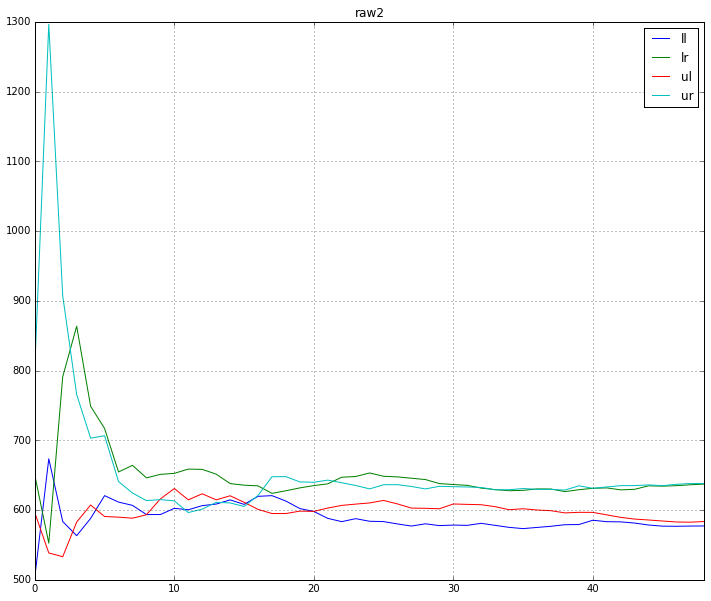

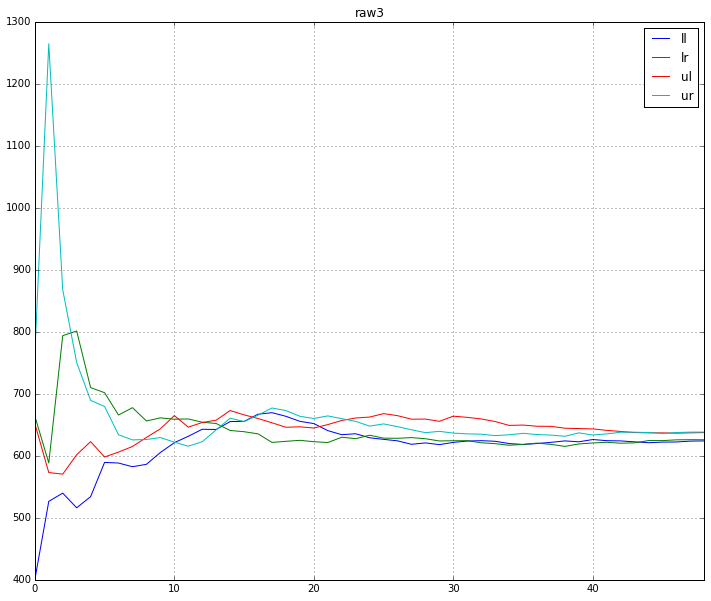

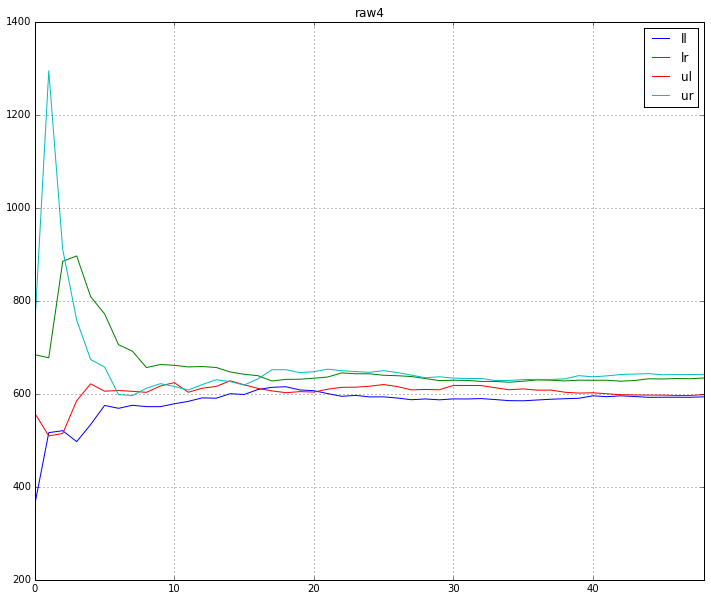

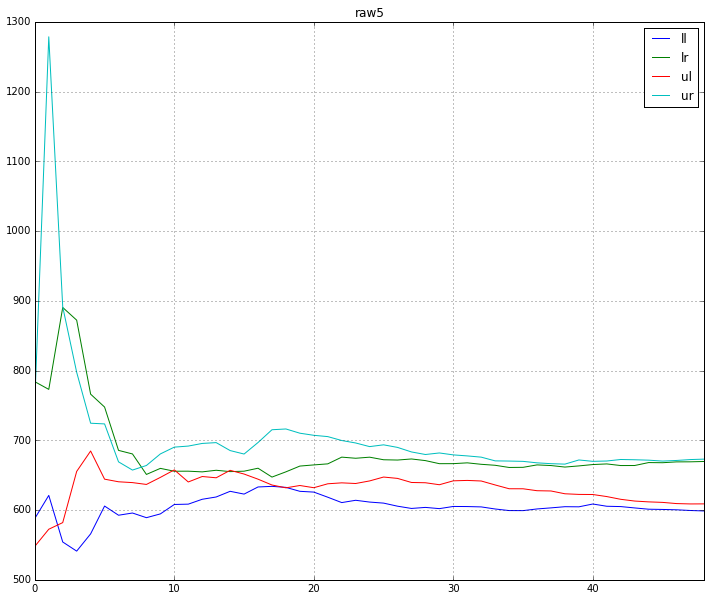

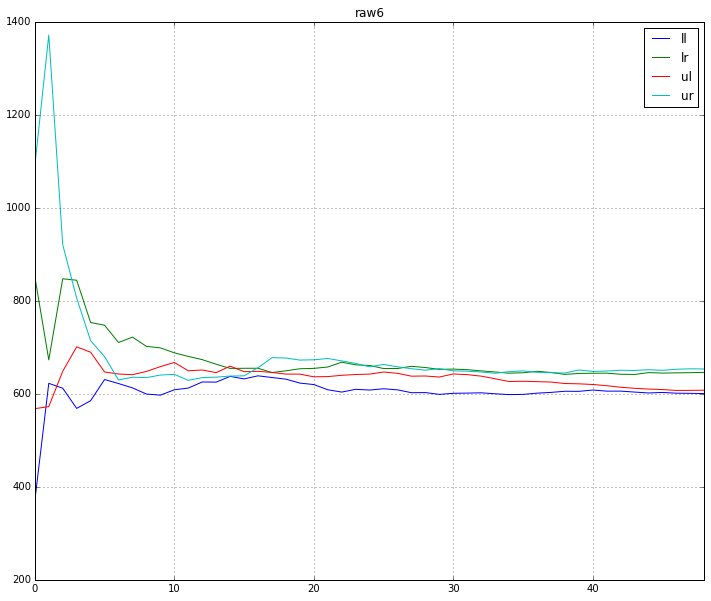

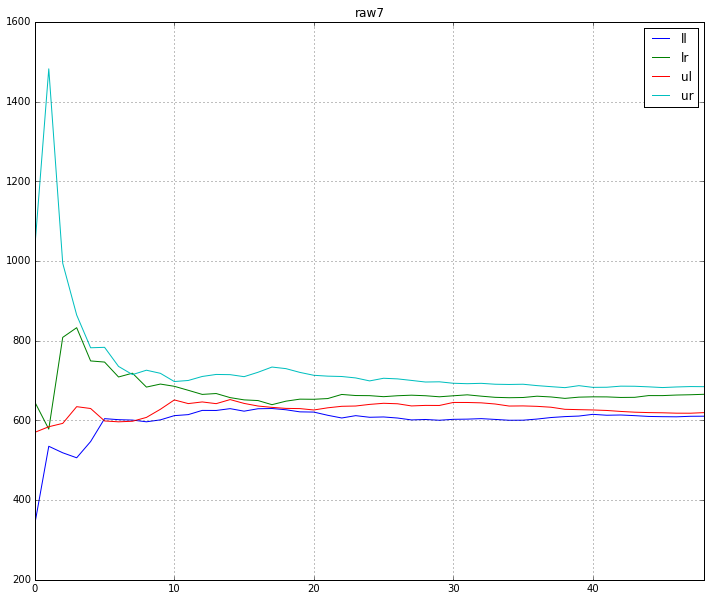

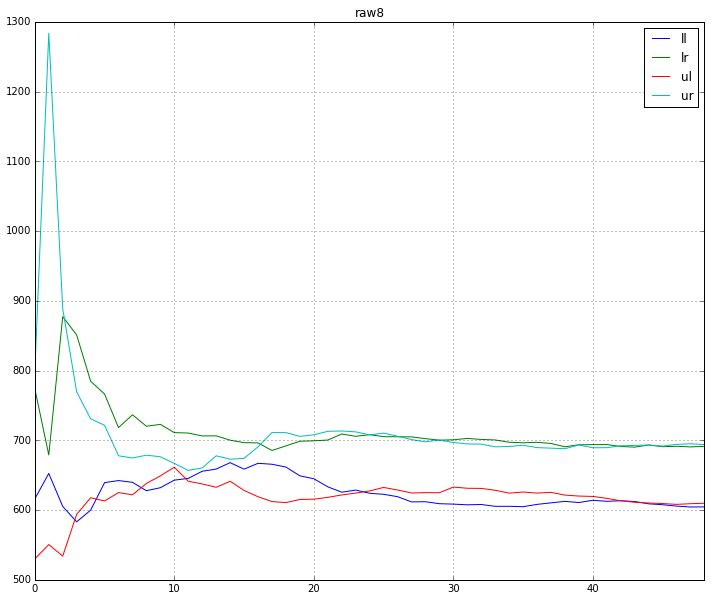

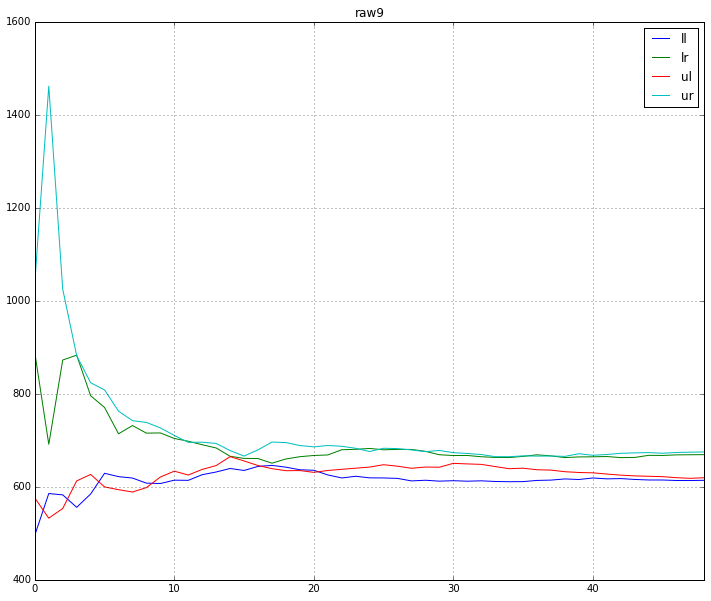

In [79]:
for j,raw in enumerate(l1b.detector_raw[:10]):
    raw0 = raw
    means_ul = []
    means_ll = []
    means_ur = []
    means_lr = []
    for i in range(1,50):
        means_ul.append(raw0[:i, :i].mean())
        means_ll.append(raw0[-i:, :i].mean())
        means_ur.append(raw0[:i, -i:].mean())
        means_lr.append(raw0[-i:, -i:].mean())
    df = pd.DataFrame({'ul':means_ul,
              'll':means_ll,
              'ur':means_ur,
              'lr':means_lr})
    df.plot(title='raw{}'.format(j))

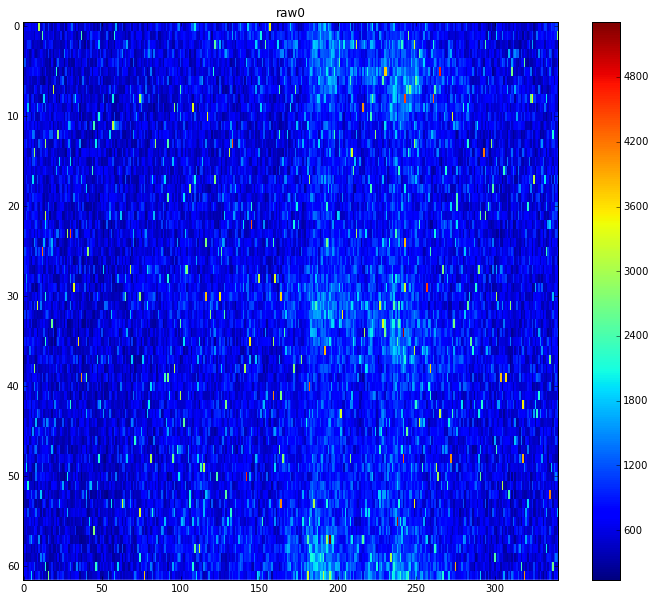

In [95]:
plt.imshow(raw0)
plt.colorbar()
plt.title('raw0')

In [53]:
dark1 = l1b.detector_dark[1]

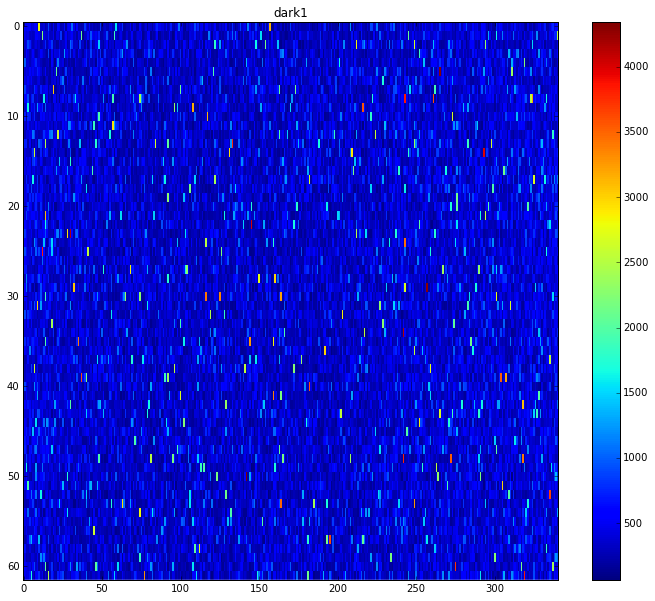

In [91]:
plt.imshow(dark1)
plt.colorbar()
plt.title('dark1')

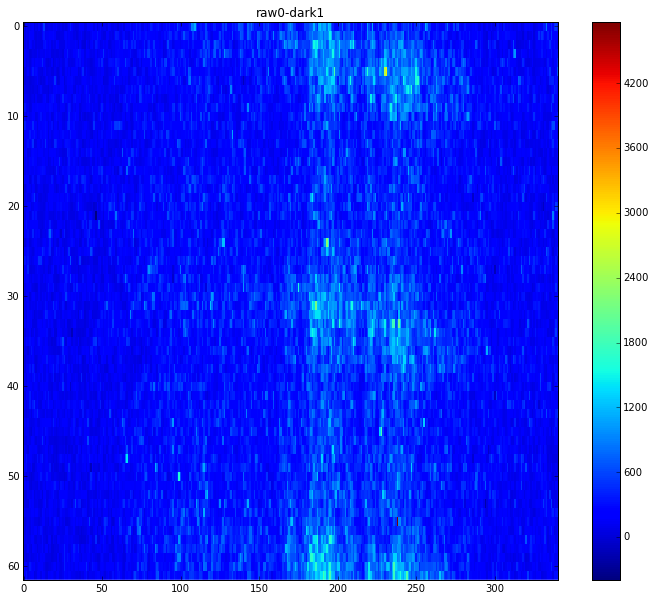

In [92]:
plt.imshow(raw0-dark1)
plt.colorbar()
plt.title('raw0-dark1')

In [63]:
def get_ul(data, i):
    return data[:i, :i]
def get_ll(data, i):
    return data[-i:, :i]
def get_ur(data, i):
    return data[:i, -i:]
def get_lr(data, i):
    return data[-i:, -i:]

In [116]:
i = 10

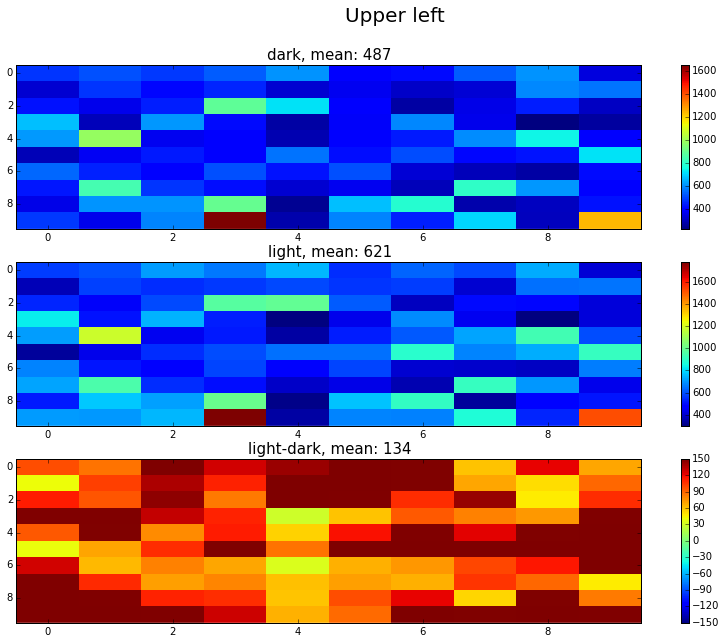

In [125]:
sublight = get_ul(raw0, i)
subdark = get_ul(dark1, i)

def compare_corners(dark, light, figtitle):
    fig, axes = plt.subplots(nrows=3)
    j = 0
    for ax, img,t in zip(axes, 
                         [dark, light, light-dark],
                         ['dark','light', 'light-dark']):
        if j==2:
            vmin = -150
            vmax = 150
        else:
            vmin = img.min()
            vmax = img.max()
        im = ax.imshow(img, vmin=vmin, vmax=vmax)
        ax.set_title("{}, mean: {:.0f}".format(t, img.mean()),
                    fontsize=15)
        plt.colorbar(im, ax=ax)
        j += 1
    fig.suptitle(figtitle, fontsize=20)
compare_corners(subdark, sublight, 'Upper left')

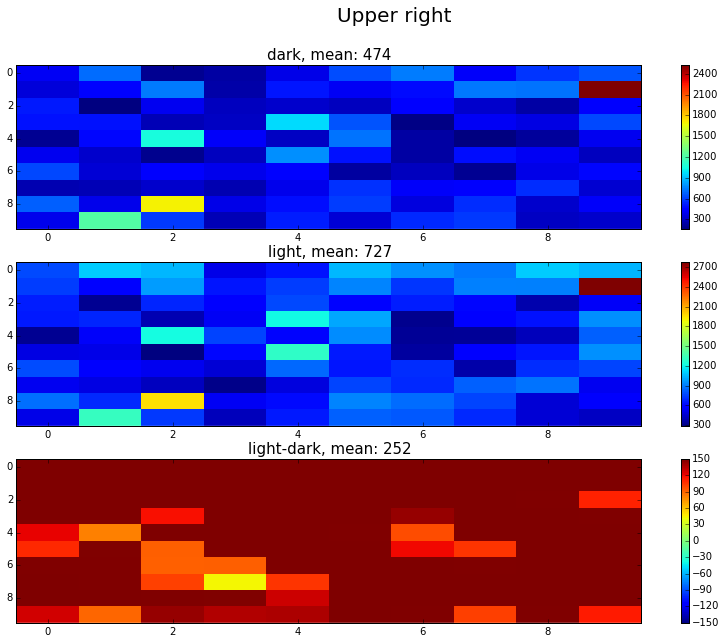

In [126]:
compare_corners(get_ur(dark1, i), get_ur(raw0, i), "Upper right")

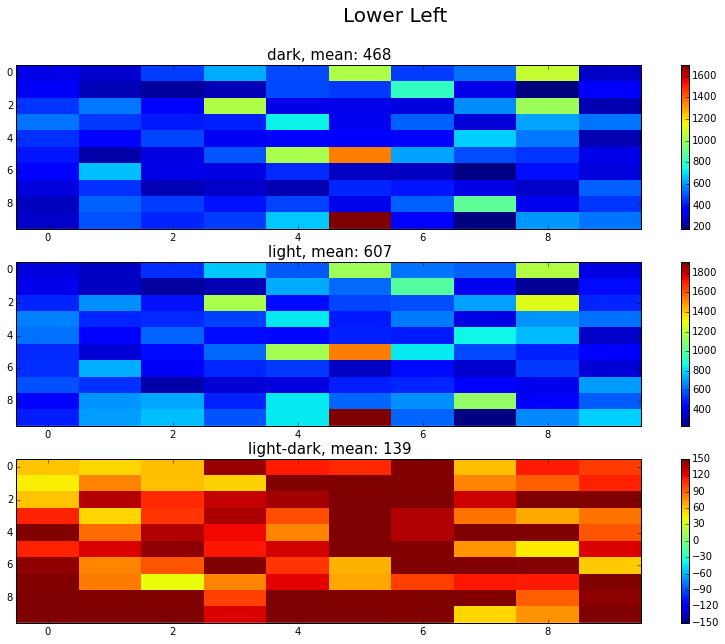

In [127]:
compare_corners(get_ll(dark1, i ), get_ll(raw0, i), 'Lower Left')

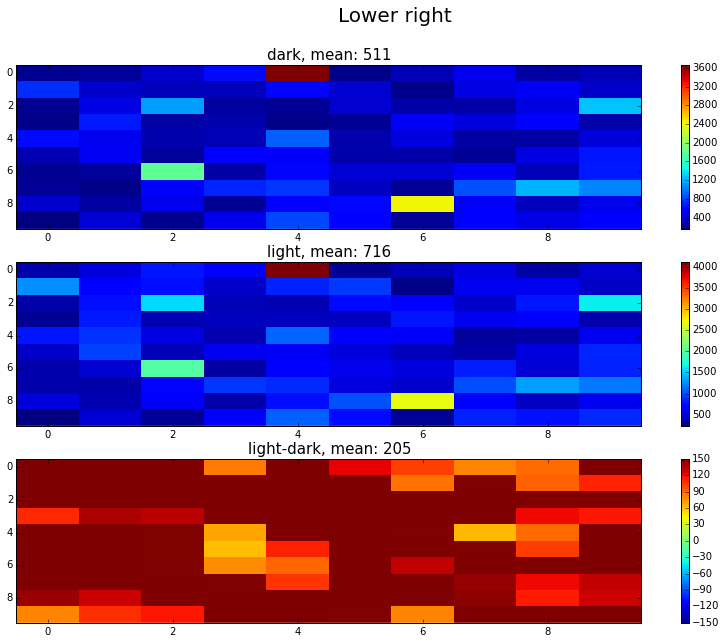

In [128]:
compare_corners(get_lr(dark1, i), get_lr(raw0, i), 'Lower right')

In [129]:
dark2 = l1b.detector_dark[2]
rawlast = l1b.detector_raw[-1]

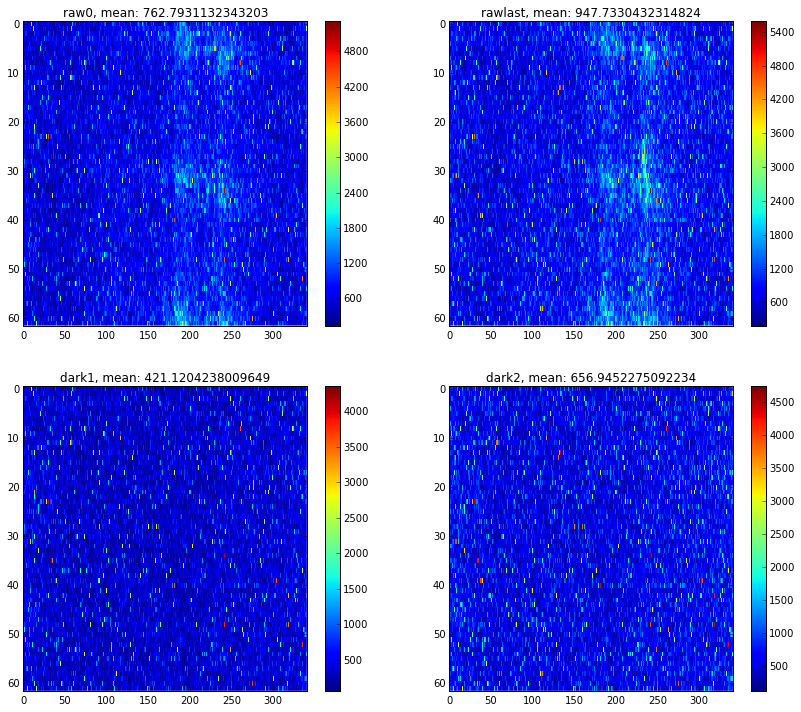

In [133]:
fig, axes = plt.subplots(nrows=2,ncols=2, figsize=(14,12))
axes = axes.flatten()
for ax, img, title in zip(axes, 
                         [raw0, rawlast, dark1, dark2], 
                         ['raw0','rawlast','dark1', 'dark2']):
    im = ax.imshow(img)
    plt.colorbar(im, ax=ax)
    ax.set_title("{}, mean: {}".format(title, img.mean()))

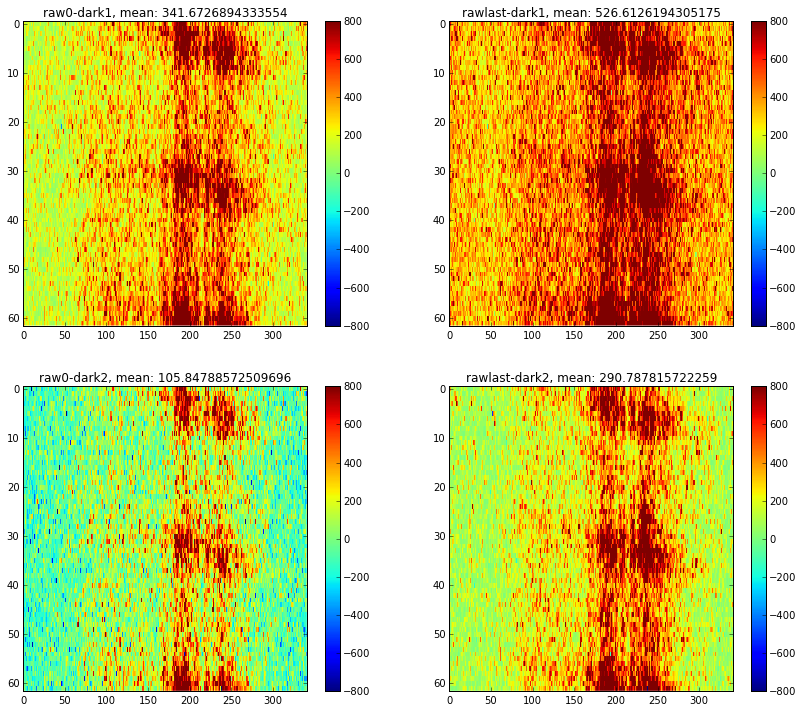

In [135]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14,12))
axes = axes.ravel()
for ax, img, title in zip(axes,
                           [raw0-dark1, rawlast-dark1, raw0-dark2, rawlast-dark2],
                           ['raw0-dark1','rawlast-dark1','raw0-dark2','rawlast-dark2']):
    im =ax.imshow(img, vmin=-800, vmax=800)
    plt.colorbar(im, ax=ax)
    ax.set_title("{}, mean: {}".format(title, img.mean()))

In [142]:
funcs = [get_ul, get_ur, get_ll, get_lr]
for func,name in zip(funcs,['UL', 'UR', 'LL', 'LR']):
    print("Corner: {}".format(name))
    for img,imgname in zip([dark1, dark2, raw0, rawlast, 
                            raw0-dark1, rawlast-dark1, raw0-dark2, rawlast-dark2],
                           ['dark1','dark2','raw0','rawlast',
                           'raw0-dark1','rawlast-dark1','raw0-dark2','rawlast-dark2']):
        print("{imgname} mean: {avg:.0f}".format(imgname=imgname, avg=func(img,10).mean()))
    print('\n')

Corner: UL
dark1 mean: 487
dark2 mean: 762
raw0 mean: 621
rawlast mean: 909
raw0-dark1 mean: 134
rawlast-dark1 mean: 421
raw0-dark2 mean: -140
rawlast-dark2 mean: 147


Corner: UR
dark1 mean: 474
dark2 mean: 746
raw0 mean: 727
rawlast mean: 871
raw0-dark1 mean: 252
rawlast-dark1 mean: 397
raw0-dark2 mean: -19
rawlast-dark2 mean: 126


Corner: LL
dark1 mean: 468
dark2 mean: 739
raw0 mean: 607
rawlast mean: 837
raw0-dark1 mean: 139
rawlast-dark1 mean: 368
raw0-dark2 mean: -132
rawlast-dark2 mean: 98


Corner: LR
dark1 mean: 511
dark2 mean: 783
raw0 mean: 716
rawlast mean: 888
raw0-dark1 mean: 205
rawlast-dark1 mean: 378
raw0-dark2 mean: -67
rawlast-dark2 mean: 105




In [143]:
print((rawlast/raw0).mean())
print((dark2/dark1).mean())

1.30339501861
1.62750260181


In [158]:
cube = l1b.detector_raw

In [149]:
df = pd.DataFrame(l1b.detector_raw.mean(axis=2).mean(axis=1), columns=['light_total_means'])

In [155]:
df['ul_mean'] = l1b.detector_raw[:,:10,:10].mean(axis=2).mean(axis=1)
df['ll_mean'] = l1b.detector_raw[:,-10:, :10].mean(axis=2).mean(axis=1)
df['ur_mean'] = l1b.detector_raw[:,10:, -10:].mean(axis=2).mean(axis=1)
df['lr_mean'] = l1b.detector_raw[:,-10:,-10:].mean(axis=2).mean(axis=1)

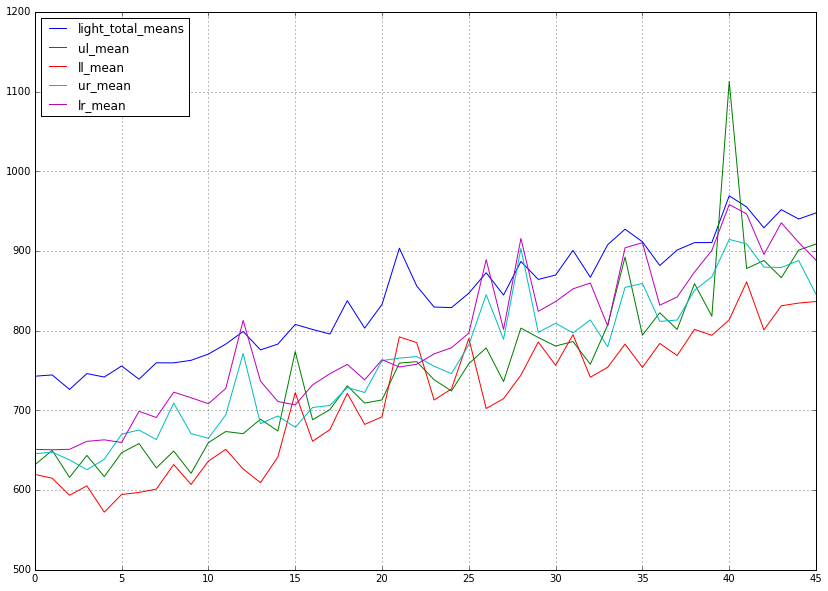

In [157]:
df.plot()

In [160]:
(cube - dark1).shape

(46, 62, 341)

In [161]:
dark1.shape

(62, 341)

In [163]:
for img in cube[:10]:
    print((img - dark1).mean())
    

321.758111815
323.315864157
305.138870495
324.997824236
320.688014379
334.563049853
317.995837669
338.567401381
338.483492574
341.672689433


In [165]:
for img in (cube - dark1)[:10]:
    print(img.mean())

321.758111815
323.315864157
305.138870495
324.997824236
320.688014379
334.563049853
317.995837669
338.567401381
338.483492574
341.672689433


In [166]:
cube.shape

(46, 62, 341)

In [167]:
dark1.shape

(62, 341)

In [168]:
(cube - dark1).shape

(46, 62, 341)

In [169]:
import plotly.plotly as py
from plotly.graph_objs import *

trace0 = Scatter(
    x=[1, 2, 3, 4],
    y=[10, 15, 13, 17]
)
trace1 = Scatter(
    x=[1, 2, 3, 4],
    y=[16, 5, 11, 9]
)
data = Data([trace0, trace1])

py.iplot(data, filename = 'basic-line')